# Airbnb EDA Project - Albany, New York

## Project Overview:
This project conducts an exploratory data analysis (EDA) of Airbnb listings in Albany, New York. The analysis focuses on key factors like price, availability, location, and property type to uncover trends and insights.

## Objectives:
- Clean the dataset efficiently by handling missing values and removing outliers.
- Utilize Python and Jupyter Notebook for analysis, using Pandas, NumPy, Matplotlib, and Seaborn.
- Generate insightful visualizations to depict Airbnb market dynamics.
- Perform statistical analysis to validate findings.
- Provide clear explanations of findings and propose a business plan based on insights.

## Dataset:
- [Inside Airbnb - Albany Listings](http://insideairbnb.com/get-the-data/): Choose any relevant and up-to-date CSV file for analysis.

## Jupyter Notebook File:
- [Airbnb_EDA_Alban​y.ipynb](http://data.insideairbnb.com/united-states/ny/albany/2024-01-06/visualisations/listings.csv): Link to the Jupyter Notebook file containing the analysis.



## Importing Tools 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Load Data 🫰🎯

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
# random sample of 3 rows from 'df'
df.sample(2) 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
141,52301345,Townhouse in Albany · ★4.25 · 1 bedroom · 2 be...,49100926,Clyde,NaN,SIXTH WARD,42.65934,-73.76966,Private room,100.0,2,4,2022-08-16,0.18,4,364,0,NaN
74,39093517,Rental unit in Albany · ★4.81 · 2 bedrooms · 1...,299638115,Dominick,NaN,SIXTH WARD,42.65507,-73.76138,Entire home/apt,151.0,4,36,2023-08-25,0.72,3,356,2,NaN


In [4]:
# Print information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              410 non-null    int64  
 1   name                            410 non-null    object 
 2   host_id                         410 non-null    int64  
 3   host_name                       410 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   410 non-null    object 
 6   latitude                        410 non-null    float64
 7   longitude                       410 non-null    float64
 8   room_type                       410 non-null    object 
 9   price                           404 non-null    float64
 10  minimum_nights                  410 non-null    int64  
 11  number_of_reviews               410 non-null    int64  
 12  last_review                     361 

## Data Preprocessing 🔎⚔️

In [5]:
# Set 'id' and 'host_id' as the DataFrame's index, modifying the DataFrame in-place 
df.set_index(['id','host_id'],inplace=True)

In [6]:
# Count the number of missing values (NaN) in each column of the DataFrame 
df.isnull().sum()

name                                0
host_name                           0
neighbourhood_group               410
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               6
minimum_nights                      0
number_of_reviews                   0
last_review                        49
reviews_per_month                  49
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           410
dtype: int64

In [7]:
drop = df.drop(['neighbourhood_group','license'], axis=1 ,inplace=True)

In [8]:
# Fill missing values in 'price' column with the mean
df['price'] = df['price'].fillna(df['price'].mean())

In [9]:
# Count the frequency of each unique value in the 'last_review' column
df['last_review'].value_counts()

last_review
2023-12-03    19
2023-12-28    11
2024-01-01    10
2023-12-29    10
2023-12-30     9
              ..
2023-01-28     1
2020-03-04     1
2023-02-23     1
2023-03-31     1
2023-12-09     1
Name: count, Length: 158, dtype: int64

In [10]:
# Fill missing values in 'last_review' column with '2023-01-28' only if the column is not empty
if not df['last_review'].empty:
    df['last_review'] = df['last_review'].fillna('2023-01-28')

In [11]:
df['last_review'].isna().value_counts()

last_review
False    410
Name: count, dtype: int64

In [12]:
# Count the frequency of each unique value in the 'last_review' column
df['last_review'].value_counts()

last_review
2023-01-28    50
2023-12-03    19
2023-12-28    11
2024-01-01    10
2023-12-29    10
              ..
2020-07-03     1
2020-03-04     1
2020-04-24     1
2023-02-23     1
2023-12-09     1
Name: count, Length: 158, dtype: int64

In [13]:
df['last_review'].isnull().sum()

0

In [14]:
df['reviews_per_month'].isna().sum()

49

In [15]:
df['reviews_per_month'].value_counts()

reviews_per_month
1.00    6
0.14    5
0.21    5
0.18    5
0.29    5
       ..
2.17    1
5.78    1
6.73    1
0.25    1
1.36    1
Name: count, Length: 247, dtype: int64

In [16]:
if not df['reviews_per_month'].empty:
    df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].min())

In [17]:
df['reviews_per_month'].value_counts()

reviews_per_month
0.02    50
1.00     6
0.29     5
0.31     5
0.14     5
        ..
5.78     1
6.73     1
0.25     1
1.44     1
1.36     1
Name: count, Length: 247, dtype: int64

In [18]:
df['reviews_per_month'].isna().sum()

0

In [19]:
# Count the total number of missing values (NaN) across all columns in the DataFrame
df.isna().sum()

name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [20]:
df.duplicated().value_counts()

False    410
Name: count, dtype: int64

## Data Exploratory

In [21]:
df['price'].value_counts()

price
50.0     12
120.0    12
99.0     12
115.0    11
125.0    10
         ..
47.0      1
180.0     1
83.0      1
179.0     1
58.0      1
Name: count, Length: 143, dtype: int64

In [22]:
df['neighbourhood'].value_counts()

neighbourhood
SIXTH WARD         87
SECOND WARD        49
TENTH WARD         41
THIRD WARD         38
NINTH WARD         36
FOURTEENTH WARD    34
THIRTEENTH WARD    30
SEVENTH WARD       17
FIFTEENTH WARD     16
ELEVENTH WARD      16
FOURTH WARD        13
EIGHTH WARD         9
FIRST WARD          9
FIFTH WARD          8
TWELFTH WARD        7
Name: count, dtype: int64

In [23]:
df['room_type'].value_counts()

room_type
Entire home/apt    286
Private room       123
Shared room          1
Name: count, dtype: int64

In [24]:
df['minimum_nights'].value_counts()

minimum_nights
1      197
2      101
3       35
4       19
30      13
5        9
7        9
10       8
13       5
14       4
6        3
180      1
90       1
70       1
365      1
60       1
28       1
15       1
Name: count, dtype: int64

In [25]:
df['number_of_reviews'].value_counts()

number_of_reviews
0      49
1      26
5      17
4      15
2      15
       ..
66      1
107     1
104     1
428     1
239     1
Name: count, Length: 140, dtype: int64

In [26]:
df['last_review'].value_counts()

last_review
2023-01-28    50
2023-12-03    19
2023-12-28    11
2024-01-01    10
2023-12-29    10
              ..
2020-07-03     1
2020-03-04     1
2020-04-24     1
2023-02-23     1
2023-12-09     1
Name: count, Length: 158, dtype: int64

In [27]:
df['reviews_per_month'].value_counts()

reviews_per_month
0.02    50
1.00     6
0.29     5
0.31     5
0.14     5
        ..
5.78     1
6.73     1
0.25     1
1.44     1
1.36     1
Name: count, Length: 247, dtype: int64

In [28]:
df['calculated_host_listings_count'].value_counts()

calculated_host_listings_count
1     124
3      51
2      48
6      42
8      32
4      28
10     20
19     19
15     15
12     12
5      10
9       9
Name: count, dtype: int64

In [29]:
df['availability_365'].value_counts()

availability_365
0      70
365    24
364    11
358     8
269     7
       ..
293     1
280     1
85      1
112     1
148     1
Name: count, Length: 153, dtype: int64

In [30]:
df['number_of_reviews_ltm'].value_counts()

number_of_reviews_ltm
0     80
1     36
3     26
2     26
6     14
      ..
69     1
46     1
57     1
45     1
48     1
Name: count, Length: 74, dtype: int64

#  Data Visualization 📊

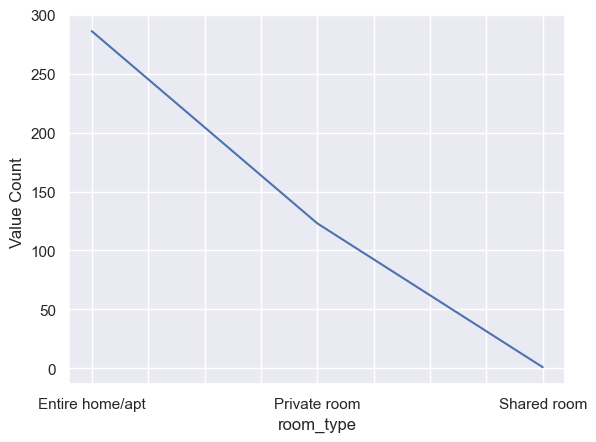

In [31]:
df['room_type'].value_counts().plot(kind='line')
plt.ylabel('Value Count ')
plt.show()

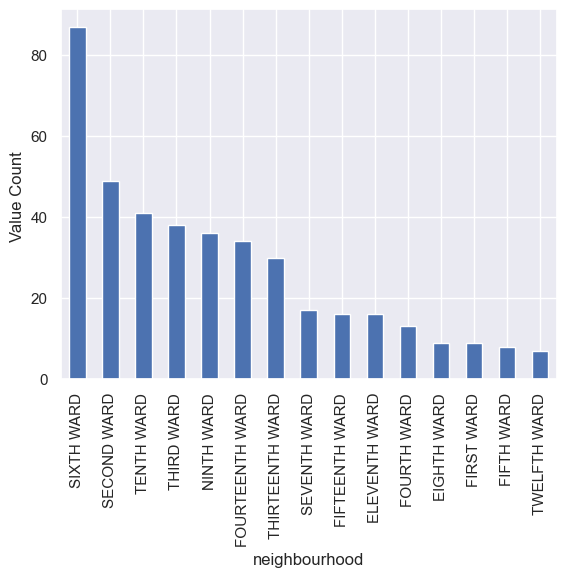

In [32]:
df['neighbourhood'].value_counts().plot(kind='bar')
plt.ylabel('Value Count ')
plt.xticks(rotation=90)
plt.show()

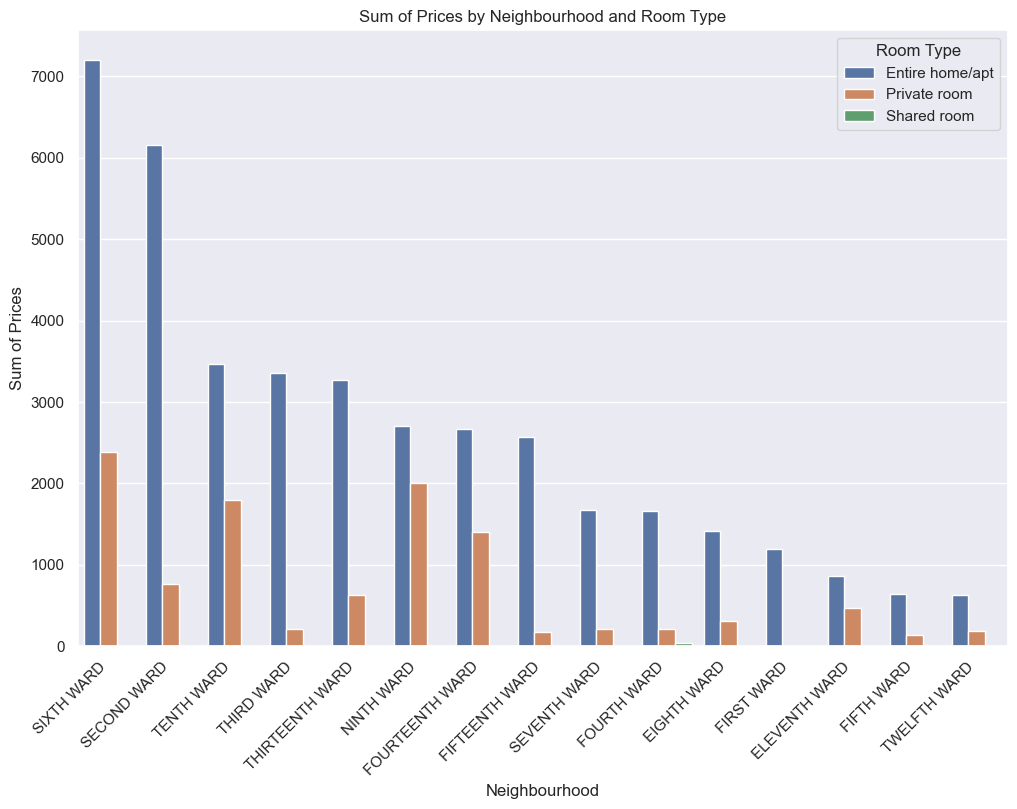

In [33]:
grouped_data = df.groupby(['neighbourhood', 'room_type'])['price'].sum().reset_index()

# Sorting the data for better visualization
grouped_data = grouped_data.sort_values(by='price', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood', y='price', hue='room_type', data=grouped_data)
plt.title('Sum of Prices by Neighbourhood and Room Type')
plt.xlabel('Neighbourhood')
plt.ylabel('Sum of Prices')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Room Type')

plt.show()


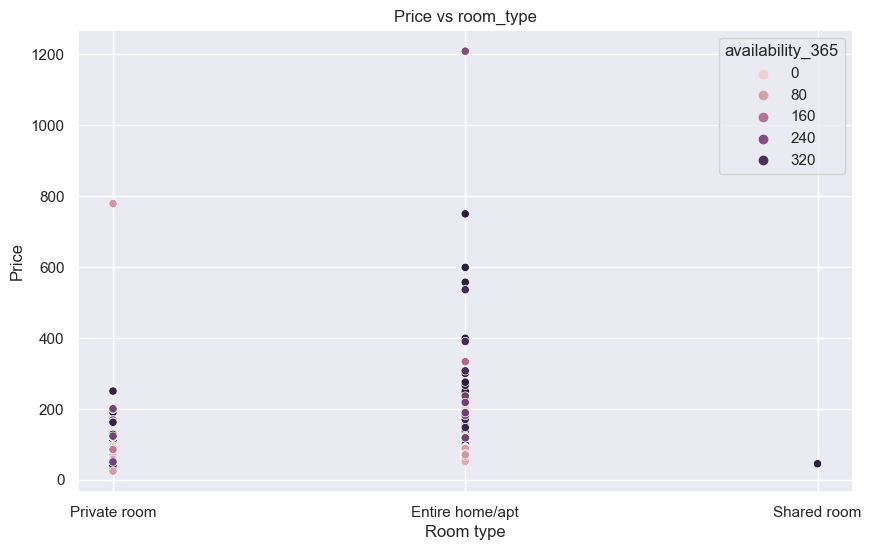

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_type', y='price', hue='availability_365', data=df)
plt.title('Price vs room_type')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.legend(title='availability_365')
plt.show()

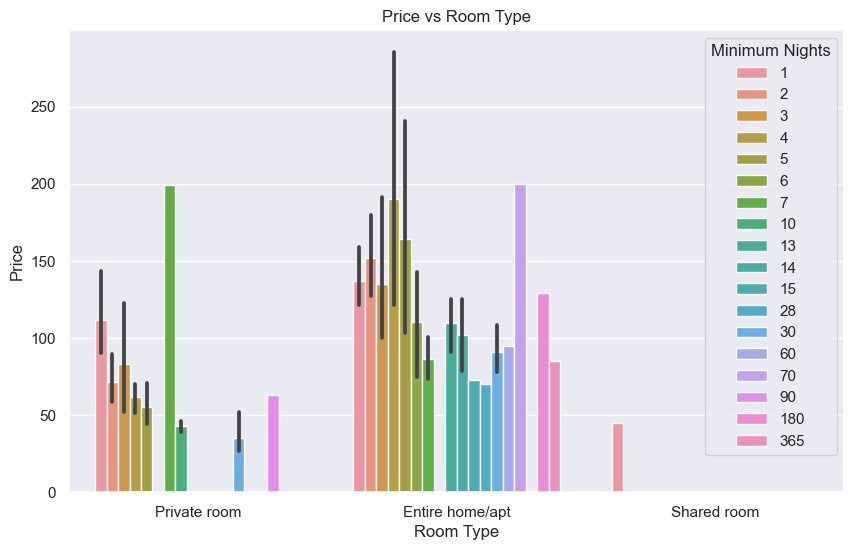

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', hue='minimum_nights', data=df)
plt.title('Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.legend(title='Minimum Nights')
plt.show()

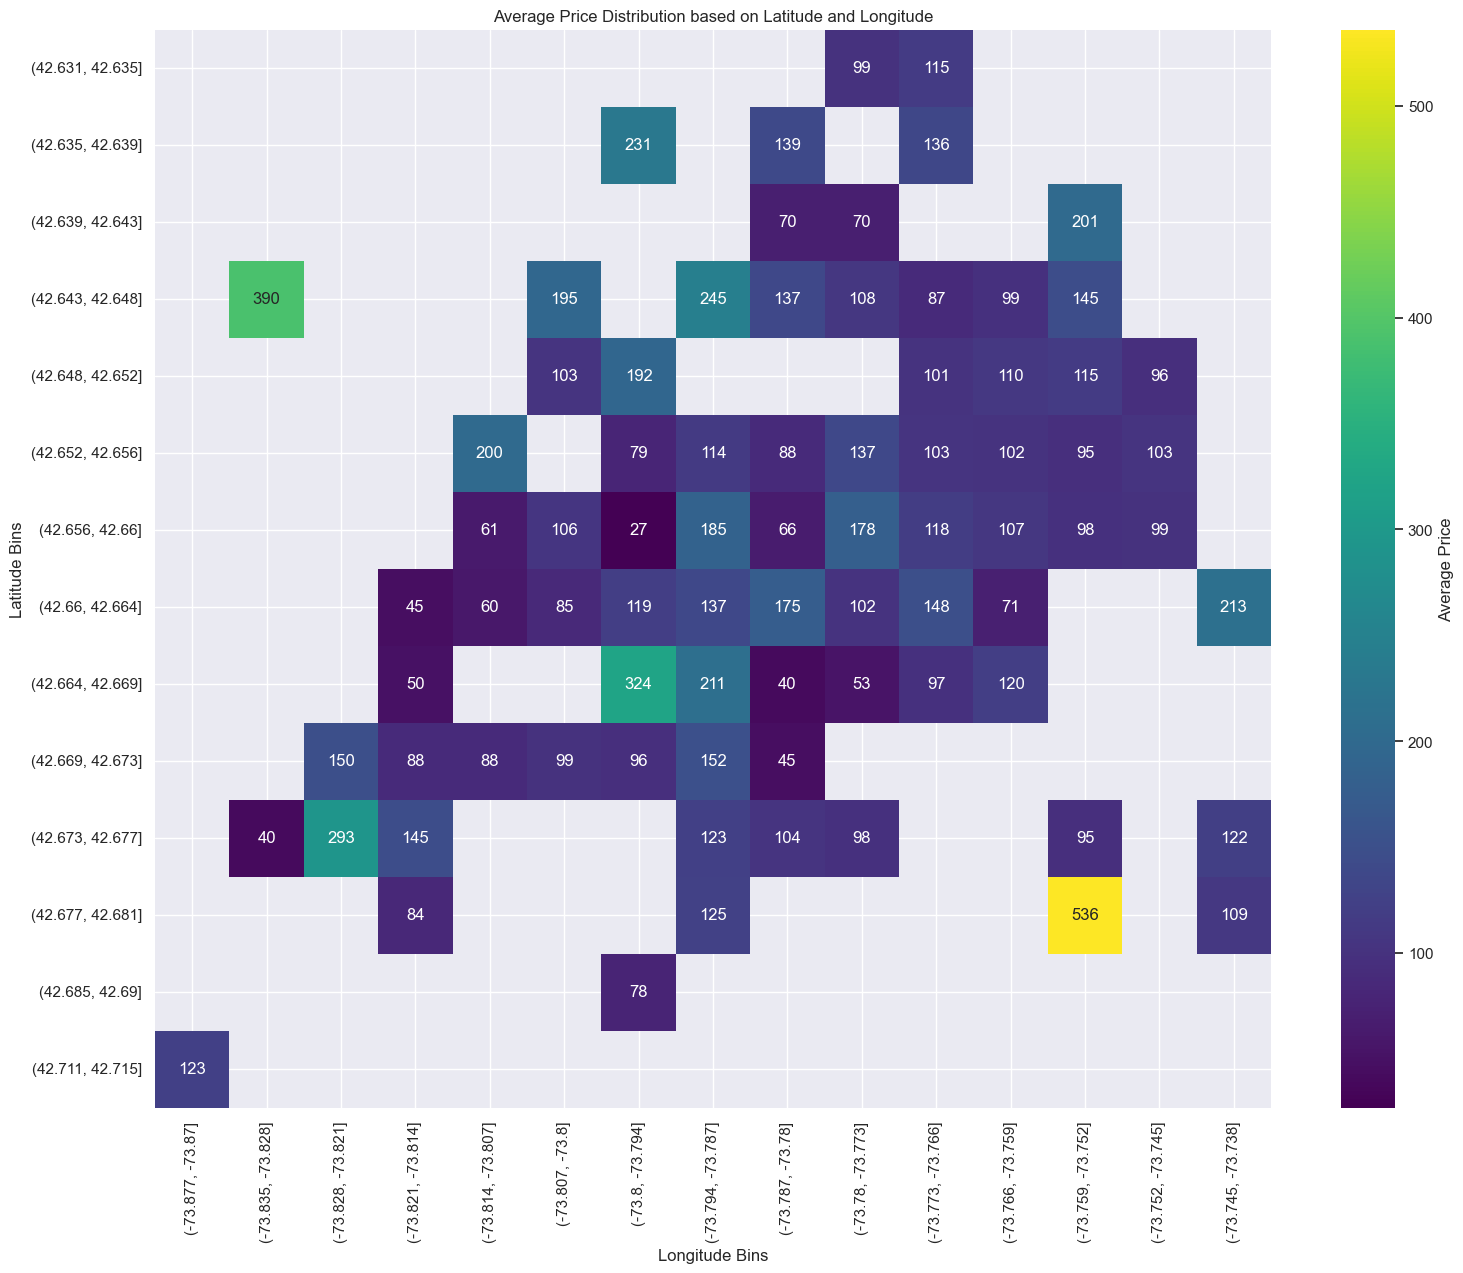

In [36]:
# Create latitude and longitude bins
latitude_bins = pd.cut(df['latitude'], bins=20)
longitude_bins = pd.cut(df['longitude'], bins=20)

# Group by latitude and longitude bins, calculate the average price
grouped_data = df.groupby([latitude_bins, longitude_bins])['price'].mean().reset_index()

# Reshape the data for the bar plot
pivot_data = grouped_data.pivot_table(values='price', index='latitude', columns='longitude')

# Plotting the bar plot
plt.figure(figsize=(18, 14))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Average Price'})
plt.title('Average Price Distribution based on Latitude and Longitude')
plt.xlabel('Longitude Bins')
plt.ylabel('Latitude Bins')

# Show the plot
plt.show()

In [37]:
# Convert 'last_review' column to datetime format 
df['last_review'] = pd.to_datetime(df['last_review'])

In [38]:
# Extract the year from the 'last_review' column (assuming it's a datetime format) and store it in a new column named 'year'
df['year'] = df['last_review'].dt.year

In [39]:
# Add month names as a new column 'month' based on the month values in 'last_review'
df['month'] = df['last_review'].dt.month_name()

In [40]:
# Add 'day' column with day names from 'last_review' dates
df['day'] = df['last_review'].dt.day_name()

In [41]:
# Add a 'quarter' column with the quarter extracted from the 'last_review' dates
df['qurter'] = df['last_review'].dt.quarter

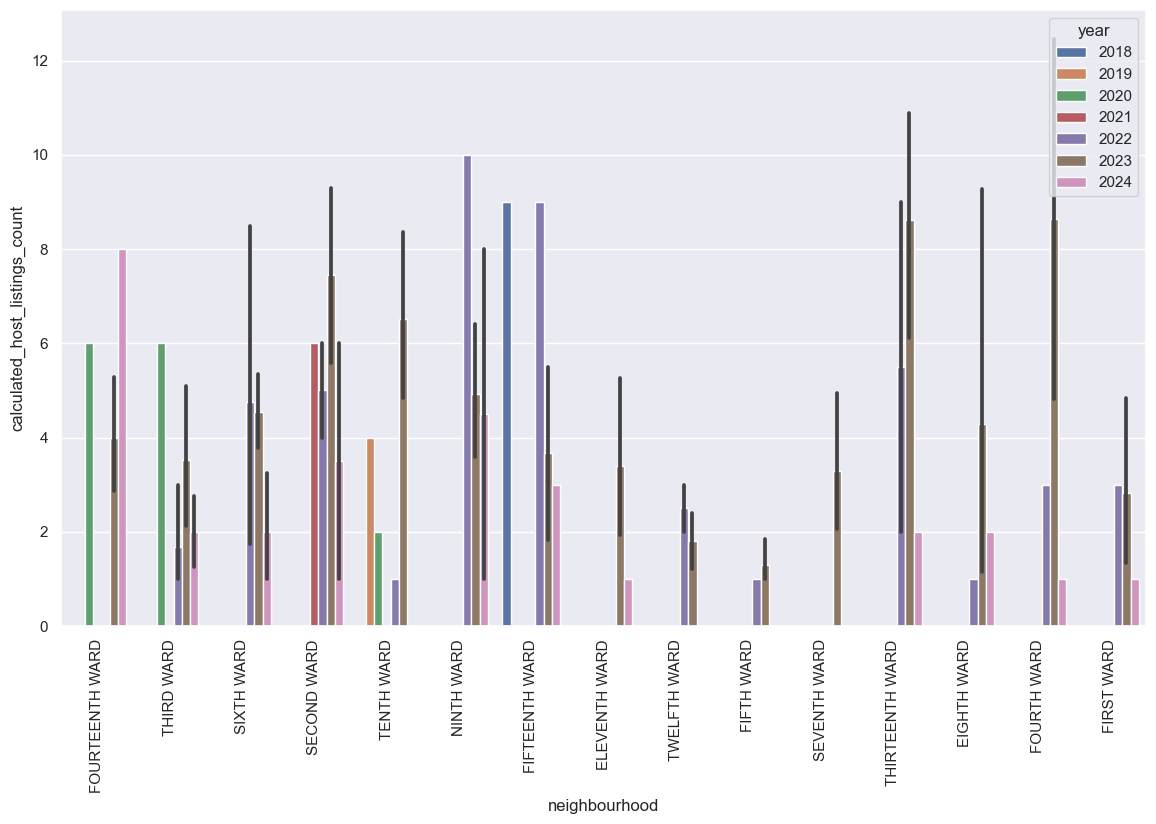

In [42]:
plt.figure(figsize=(14,8))
sns.barplot(data=df ,x= 'neighbourhood', y ='calculated_host_listings_count' ,hue='year')
plt.xticks(rotation=90)
plt.show()

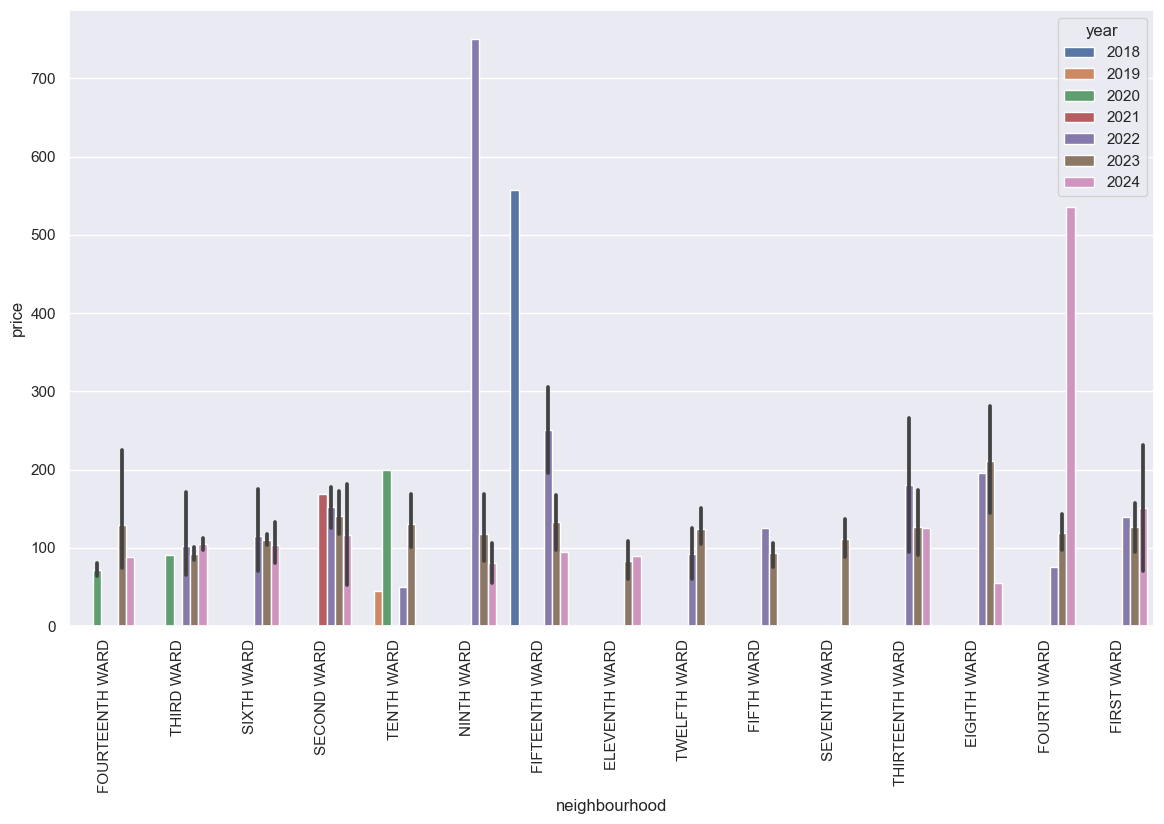

In [43]:
plt.figure(figsize=(14,8))
sns.barplot(data=df ,x= 'neighbourhood', y ='price' ,hue='year')
plt.xticks(rotation=90)
plt.show()

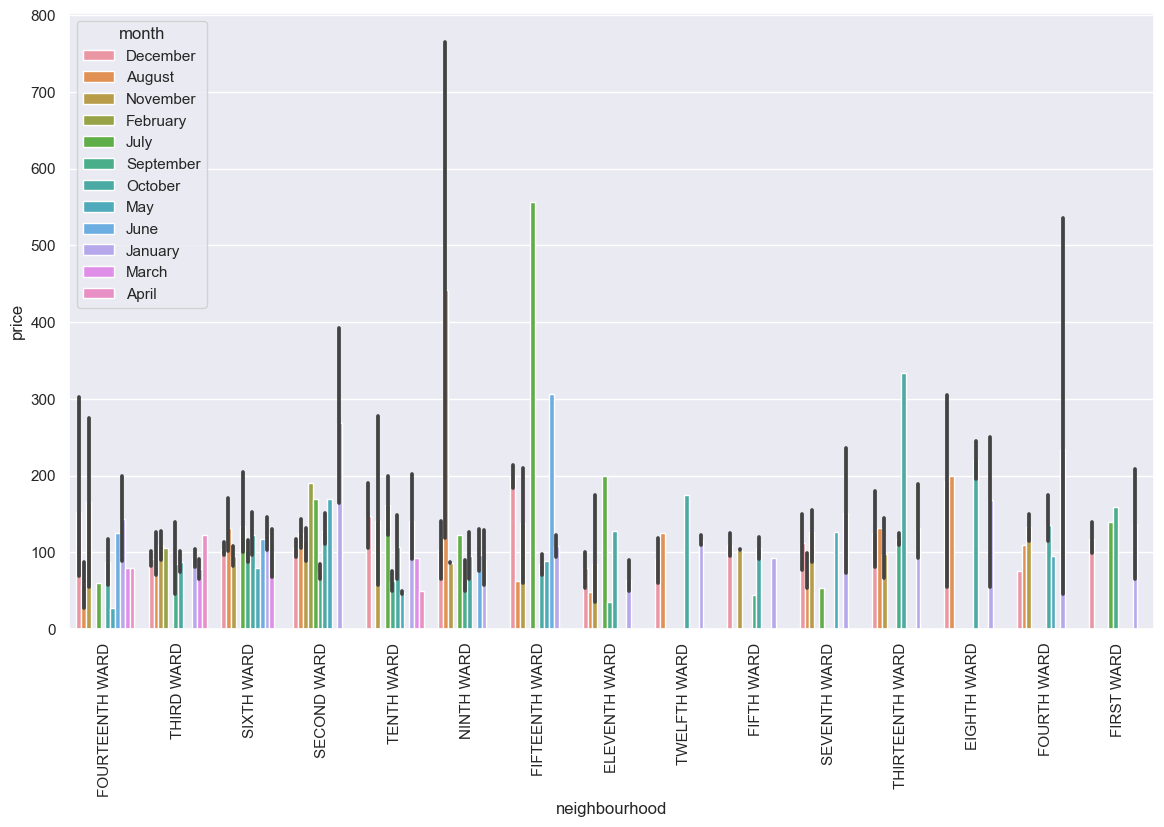

In [44]:
plt.figure(figsize=(14,8))
sns.barplot(data=df ,x= 'neighbourhood', y ='price' ,hue='month')
plt.xticks(rotation=90)
plt.show()

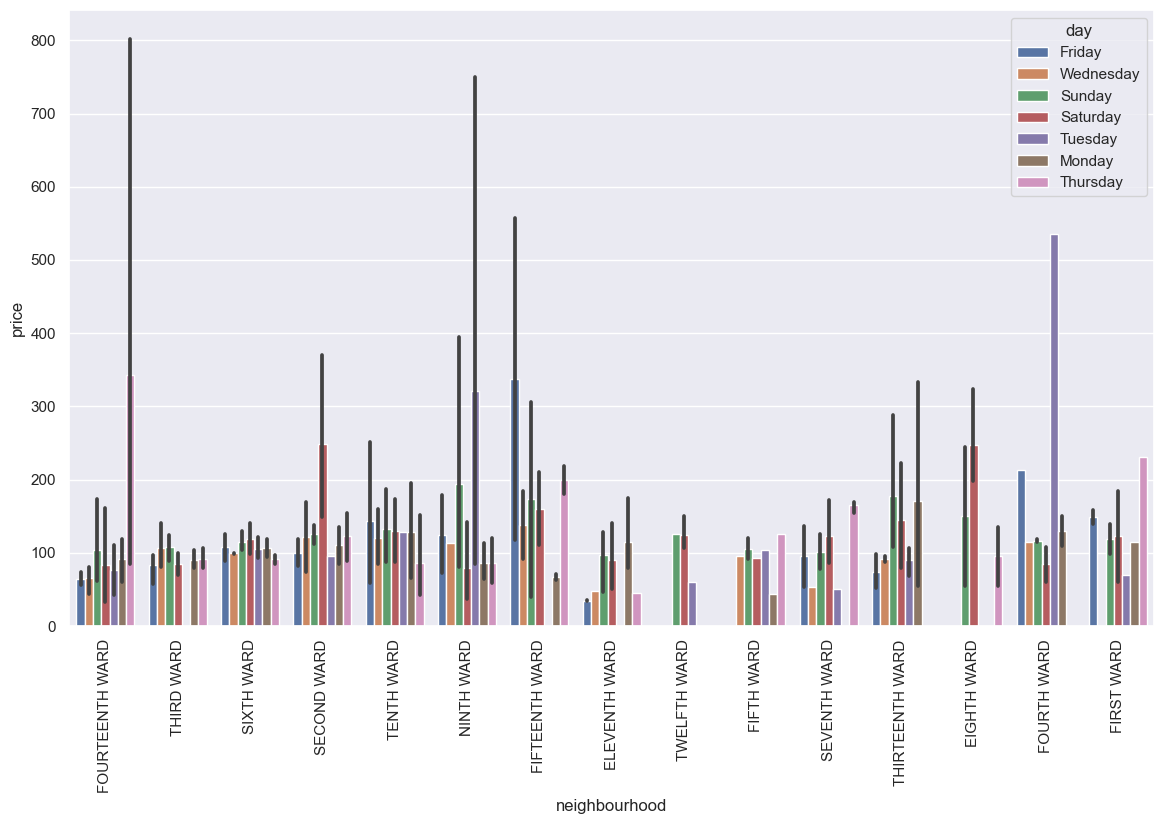

In [45]:
plt.figure(figsize=(14,8))
sns.barplot(data=df ,x= 'neighbourhood', y ='price' ,hue='day')
plt.xticks(rotation=90)
plt.show()